In [1]:
# import the relabeled data from local file
import xarray as xr
Relabeled_data_path = 'D:/VScode/MRes/Clustering_under_the_ice/Relabeled_data/'
ds_fit_relabeled_750_latlonT_5_60_95_k4=xr.open_dataset(Relabeled_data_path + 'ds_fit_relabeled_750_latlonT_5_60_95_k4.nc')
ds_fit_relabeled_750_latlonT_5_50_95_k4=xr.open_dataset(Relabeled_data_path + 'ds_fit_relabeled_750_latlonT_5_50_95_k4.nc')
ds_fit_relabeled_750_latlonT_5_70_95_k4=xr.open_dataset(Relabeled_data_path + 'ds_fit_relabeled_750_latlonT_5_70_95_k4.nc')

In [2]:
ds_fit_relabeled_750_latlonT_5_60_95_k4

<xarray.Dataset>
Dimensions:           (nprof: 44692, pressure: 148, pcm_class: 4)
Coordinates:
    profiler          (nprof) object ...
    date              (nprof) datetime64[ns] ...
    lon               (nprof) float64 ...
    lat               (nprof) float64 ...
  * pressure          (pressure) float64 -10.0 -15.0 -20.0 ... -740.0 -745.0
  * nprof             (nprof) int64 0 1 2 3 4 ... 44687 44688 44689 44690 44691
Dimensions without coordinates: pcm_class
Data variables:
    temperature       (nprof, pressure) float64 ...
    salinity          (nprof, pressure) float64 ...
    dissolved_oxygen  (nprof, pressure) float64 ...
    PCM_LABELS        (nprof) int64 ...
    lat_step          int32 ...
    lon_step          int32 ...
    quantile4T        float64 ...
    nprof_of_train    int32 ...
    PCM_POST          (pcm_class, nprof) float64 ...

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_disoxy_allinone(ds_fit)-> None:
    
    """
    Plot mean profile for each class in a single figure.

    Args:
        ds_fit: The input dataset.
    """

    unique_labels = np.unique(ds_fit.PCM_LABELS.values)
    num_classes = len(unique_labels)

    fig, axs = plt.subplots(1, 1, figsize=(4, 5), dpi=300)
    color_list = ['red', 'saddlebrown', 'deepskyblue',  'purple']  # Define your own color list

    sequence=[0,1,2,3]

    for i in sequence:
        ds_class = ds_fit.where(ds_fit.PCM_LABELS == i, drop=True)

        # ds_class1 = ds_class.copy().where(~np.isnan(ds_class['dissolved_oxygen']), drop=True)
        oxy_data=ds_class['dissolved_oxygen'].values
        nan_rows = np.isnan(oxy_data).any(axis=1)

        # Delete rows with NaN values
        oxy_data_without_nan = oxy_data[~nan_rows]


        qua5_oxy = np.quantile(oxy_data_without_nan, 0.05, axis=0)
        qua95_oxy = np.quantile(oxy_data_without_nan, 0.95, axis=0)
        qua50_oxy = np.quantile(oxy_data_without_nan, 0.50, axis=0)

        ax = axs
        ax.plot(qua50_oxy, ds_fit['pressure'].values, c=color_list[i], label=f'Class {i}')
        ax.fill_betweenx(ds_fit['pressure'].values, qua5_oxy, qua95_oxy, color=color_list[i], alpha=0.5)
        ax.legend(loc='lower right')
        ax.set_ylim([np.min(ds_fit['pressure'].values), np.max(ds_fit['pressure'].values)])
        ax.set_ylabel('Pressure (dbar)')
        ax.set_xlabel('Dissoved Oxygen')


    plt.show()

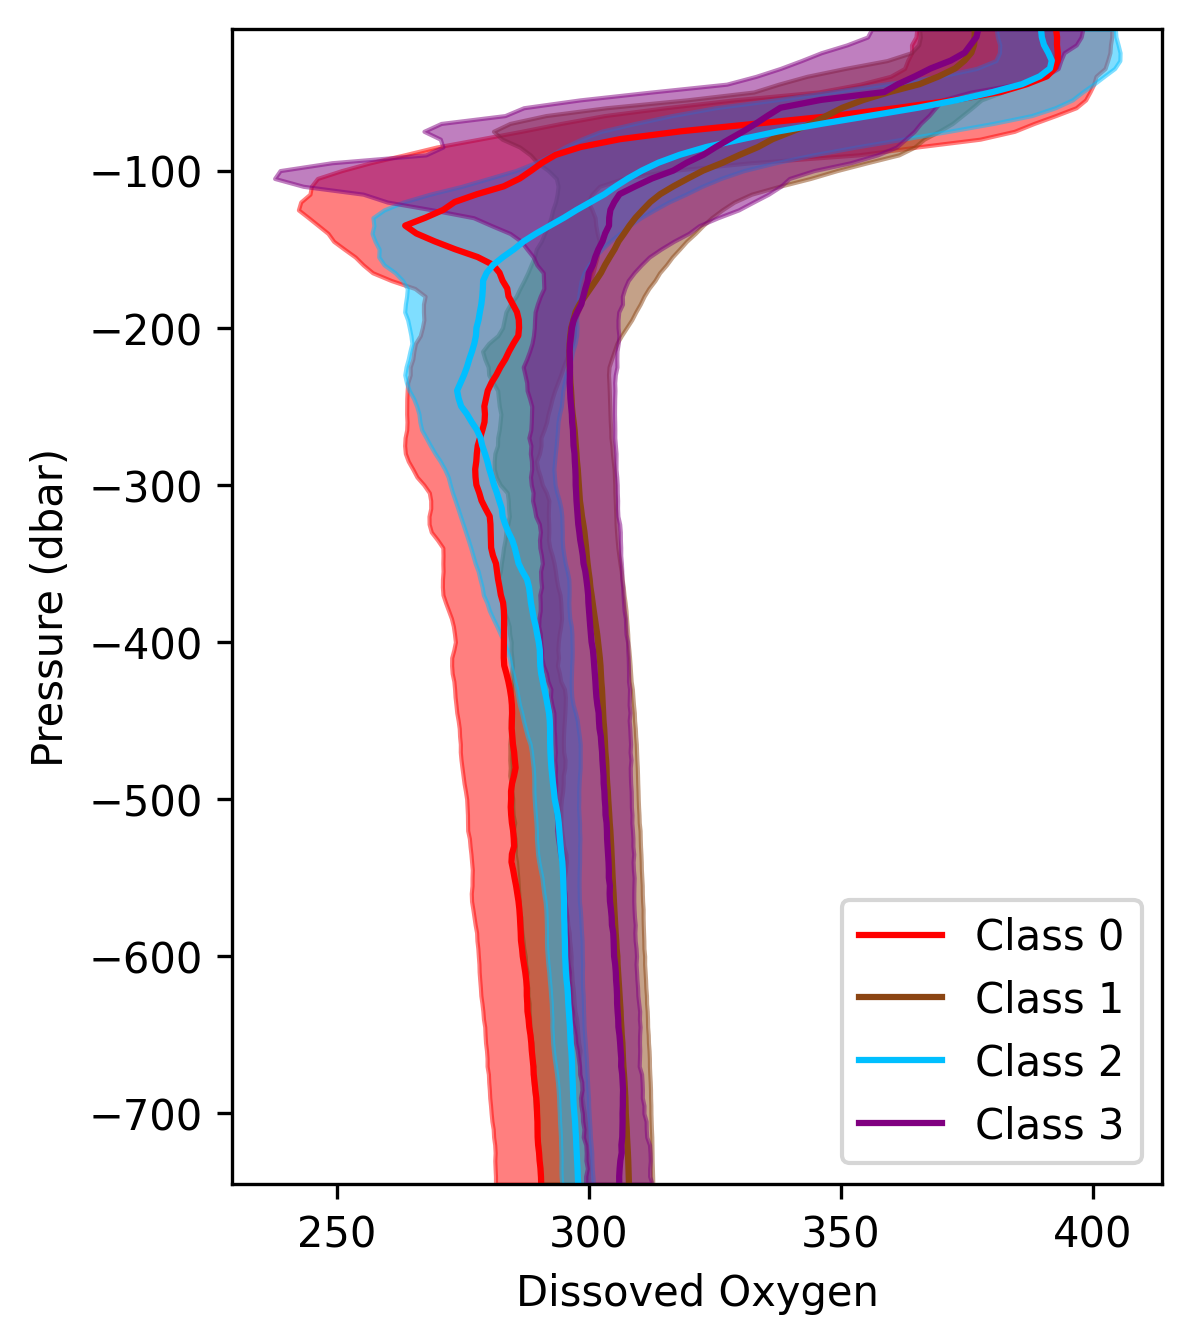

In [71]:
plot_mean_disoxy_allinone(ds_fit_relabeled_750_latlonT_5_60_95_k4)

In [18]:
ds_class = ds_fit_relabeled_750_latlonT_5_60_95_k4.where(ds_fit_relabeled_750_latlonT_5_60_95_k4.PCM_LABELS == 1, drop=True)

In [19]:
# get the data with dissolved_oxygen not nan
ds_class1 = ds_class.copy().where(~np.isnan(ds_class['dissolved_oxygen']), drop=True)

In [20]:
ds_class1

<xarray.Dataset>
Dimensions:           (nprof: 2309, pressure: 148, pcm_class: 4)
Coordinates:
    profiler          (nprof) object itp29grd0728 itp29grd0729 ... itp95grd0457
    date              (nprof) datetime64[ns] 2009-08-31T06:00:05.184000 ... 2...
    lon               (nprof) float64 -87.91 -86.63 -85.2 ... 10.49 10.96 11.2
    lat               (nprof) float64 88.41 88.5 88.56 ... 84.23 84.15 84.11
  * pressure          (pressure) float64 -10.0 -15.0 -20.0 ... -740.0 -745.0
  * nprof             (nprof) int64 18053 18054 18056 ... 43129 43130 43131
Dimensions without coordinates: pcm_class
Data variables:
    temperature       (nprof, pressure) float64 -1.522 -1.519 ... 0.06957 0.0595
    salinity          (nprof, pressure) float64 28.92 28.93 ... 34.89 34.89
    dissolved_oxygen  (nprof, pressure) float64 402.9 403.1 ... 309.3 309.2
    PCM_LABELS        (nprof, pressure) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    lat_step          (nprof, pressure) float64 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0
    lon_step          (nprof, pressure) float64 60.0 60.0 60.0 ... 60.0 60.0
    quantile4T        (nprof, pressure) float64 0.95 0.95 0.95 ... 0.95 0.95
    nprof_of_train    (nprof, pressure) float64 2.296e+04 ... 2.296e+04
    PCM_POST          (pcm_class, nprof, pressure) float64 0.002051 ... 0.2281

In [11]:
ds_class1['dissolved_oxygen'].values.shape    

(2148, 148)

In [12]:
q=np.quantile(ds_class1['dissolved_oxygen'].values, 0.05, axis=0)
q.shape

(148,)

In [25]:
ds_fit_relabeled_750_latlonT_5_60_95_k4

<xarray.Dataset>
Dimensions:           (nprof: 44692, pressure: 148, pcm_class: 4)
Coordinates:
    profiler          (nprof) object ...
    date              (nprof) datetime64[ns] ...
    lon               (nprof) float64 ...
    lat               (nprof) float64 ...
  * pressure          (pressure) float64 -10.0 -15.0 -20.0 ... -740.0 -745.0
  * nprof             (nprof) int64 0 1 2 3 4 ... 44687 44688 44689 44690 44691
Dimensions without coordinates: pcm_class
Data variables:
    temperature       (nprof, pressure) float64 ...
    salinity          (nprof, pressure) float64 ...
    dissolved_oxygen  (nprof, pressure) float64 ...
    PCM_LABELS        (nprof) int64 2 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 0
    lat_step          int32 ...
    lon_step          int32 ...
    quantile4T        float64 ...
    nprof_of_train    int32 ...
    PCM_POST          (pcm_class, nprof) float64 ...

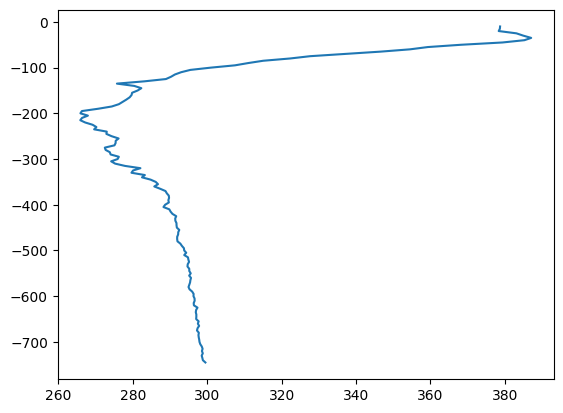

In [38]:
plt.plot(ds_fit_relabeled_750_latlonT_5_60_95_k4['dissolved_oxygen'][0].values,ds_fit_relabeled_750_latlonT_5_60_95_k4['pressure'].values)

In [58]:
oxy_data=ds_fit_relabeled_750_latlonT_5_60_95_k4['dissolved_oxygen'].values
oxy_data.shape

(44692, 148)

In [59]:
nan_rows = np.isnan(oxy_data).any(axis=1)

# Delete rows with NaN values
oxy_data_without_nan = oxy_data[~nan_rows]


In [61]:
oxy_data_without_nan.shape

(9900, 148)

In [57]:
# delete the row with nan value
for i in range(oxy_data.shape[0]):
    if np.isnan(oxy_data[i]).any():
        oxy_data=np.delete(oxy_data,i,axis=0)

oxy_data.shape


KeyboardInterrupt: 